In [2]:
import sys 
import stacklineplot
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [18, 10]

### Multi Channel Conv VAE

In [13]:
samples = np.load("../reconstruction/results_recon/mc_conv_eval_recon_1000.npy")

In [14]:
samples.shape

(32, 3, 784)

#### Original

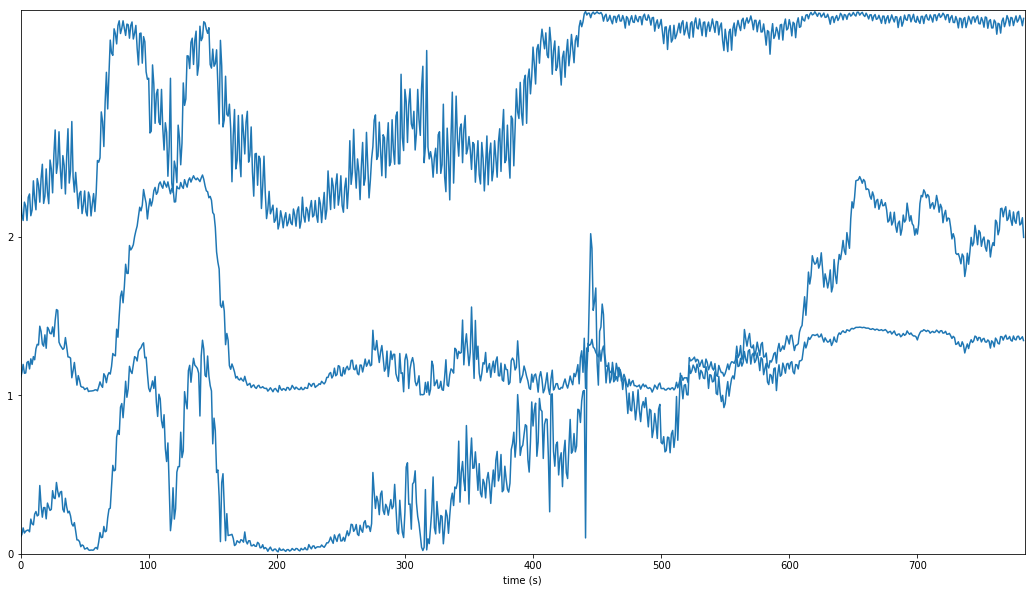

In [18]:
stacklineplot.stackplot(samples[3])

#### Recon

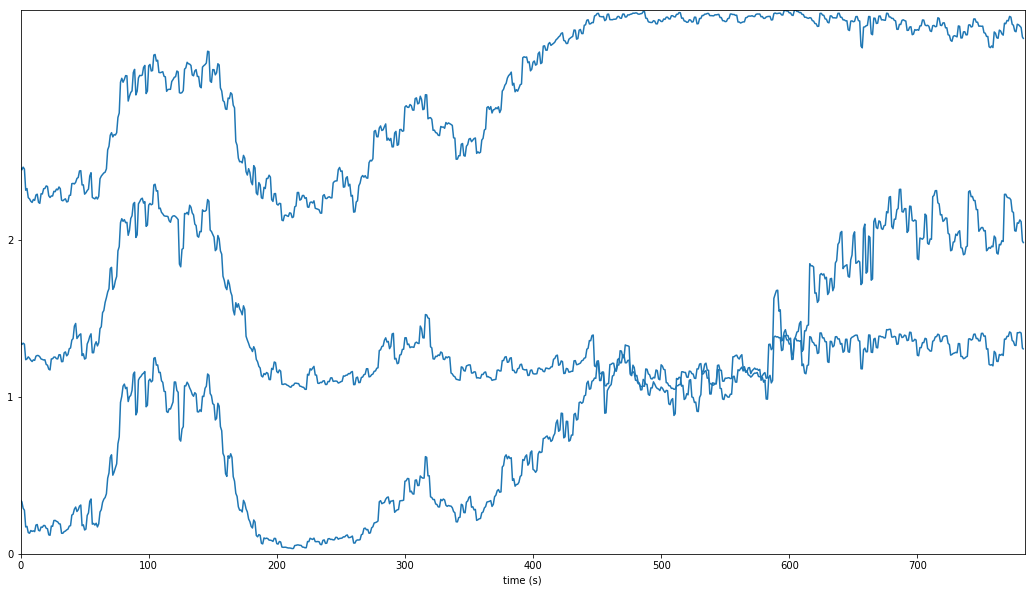

In [19]:
stacklineplot.stackplot(samples[16+3])